In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import normalized_mutual_info_score, mean_absolute_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data
df_lo = pd.read_csv("max_temps_low.csv")
df_hi = pd.read_csv("max_temps_hi.csv")

In [3]:
df_lo.head()


,Unnamed: 0,minimum_temperature_in_dc,maximum_temperature_in_dc,rainfall_in_mm,evaporation_in_mm,sunshine_in_hours,direction_of_maximum_wind_gust,speed_of_maximum_wind_gust_in_kmph,time_of_maximum_wind_gust,9am_temperature_in_dc,...,9am_msl_pressure_in_hpa,3pm_temperature_in_dc,3pm_relative_humidity_in_pct,3pm_cloud_amount_in_oktas,3pm_wind_direction,3pm_wind_speed_in_kmph,3pm_msl_pressure_in_hpa,max_demand,price_category,mean_temp
0,3/07/2021,6.6,10.6,6.6,2.8,4.5,N,43,13:45,7.9,...,1016.3,9.8,63,5,NNW,22,1014.9,6972.85,2,8.725
1,23/07/2021,7.8,11.3,0.0,0.6,1.5,N,31,01:36,8.2,...,1006.8,10.9,64,7,N,13,1003.6,7329.83,4,9.550
2,20/07/2021,9.9,11.4,0.6,2.2,0.3,SW,54,17:18,10.8,...,1005.2,8.6,86,8,SSW,13,1007.4,7556.79,3,10.175
3,22/07/2021,5.1,11.8,0.6,2.6,0.1,NNW,46,14:11,7.8,...,1015.8,10.5,66,7,N,22,1010.7,7536.62,4,8.800
4,9/07/2021,2.0,12.0,0.0,1.0,9.0,NNE,15,10:29,4.6,...,1017.9,11.0,67,2,SSW,7,1015.7,7536.11,4,7.400


In [4]:

df_lo = df_lo.drop(['direction_of_maximum_wind_gust', '9am_wind_direction', '3pm_wind_direction', 'time_of_maximum_wind_gust', 'price_category', 'mean_temp'], axis=1)
df_lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          196 non-null    object 
 1   minimum_temperature_in_dc           196 non-null    float64
 2   maximum_temperature_in_dc           196 non-null    float64
 3   rainfall_in_mm                      196 non-null    float64
 4   evaporation_in_mm                   196 non-null    float64
 5   sunshine_in_hours                   196 non-null    float64
 6   speed_of_maximum_wind_gust_in_kmph  196 non-null    int64  
 7   9am_temperature_in_dc               196 non-null    float64
 8   9am_relative_humidity_in_pct        196 non-null    int64  
 9   9am_cloud_amount_in_oktas           196 non-null    int64  
 10  9am_wind_speed_in_kmph              196 non-null    int64  
 11  9am_msl_pressure_in_hpa             196 non-n

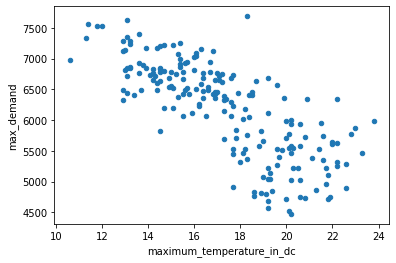

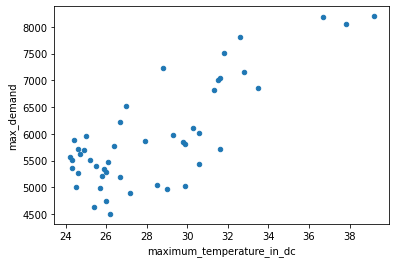

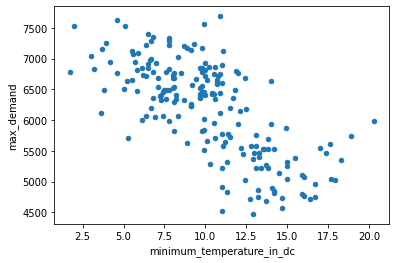

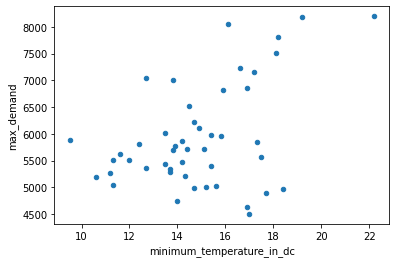

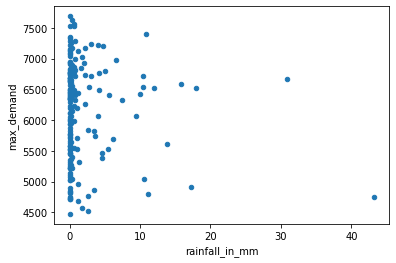

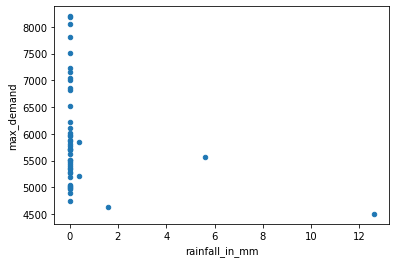

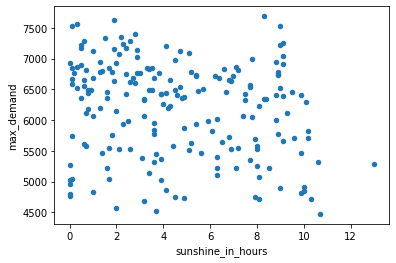

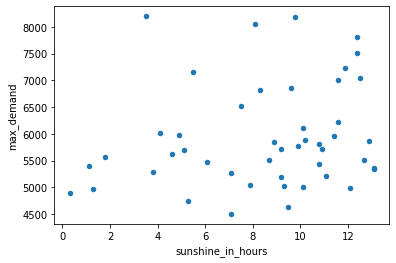

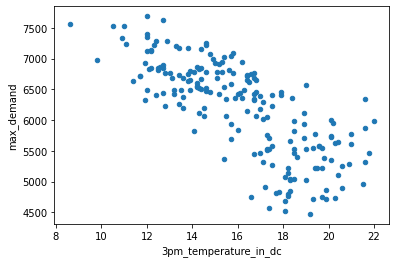

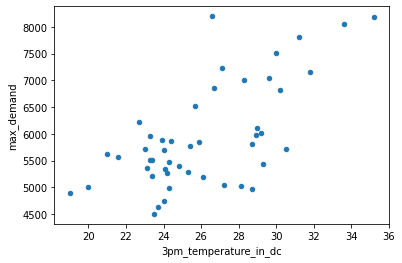

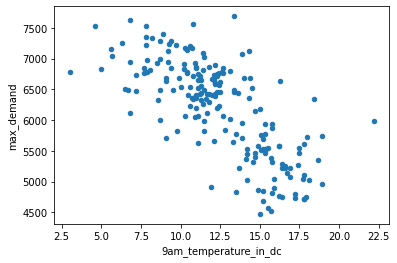

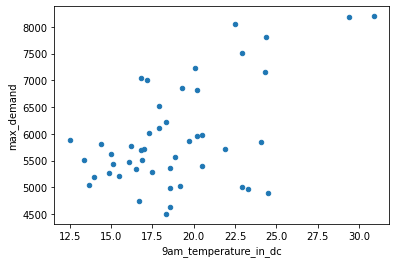

In [5]:
df_lo.plot.scatter(x = 'maximum_temperature_in_dc', y = 'max_demand');
df_hi.plot.scatter(x = 'maximum_temperature_in_dc', y = 'max_demand');
df_lo.plot.scatter(x = 'minimum_temperature_in_dc', y = 'max_demand');
df_hi.plot.scatter(x = 'minimum_temperature_in_dc', y = 'max_demand');
df_lo.plot.scatter(x = 'rainfall_in_mm', y = 'max_demand');
df_hi.plot.scatter(x = 'rainfall_in_mm', y = 'max_demand');
df_lo.plot.scatter(x = 'sunshine_in_hours', y = 'max_demand');
df_hi.plot.scatter(x = 'sunshine_in_hours', y = 'max_demand');
df_lo.plot.scatter(x = '3pm_temperature_in_dc', y = 'max_demand');
df_hi.plot.scatter(x = '3pm_temperature_in_dc', y = 'max_demand');
df_lo.plot.scatter(x = '9am_temperature_in_dc', y = 'max_demand');
df_hi.plot.scatter(x = '9am_temperature_in_dc', y = 'max_demand');

In [24]:
df_lo.corr()

,minimum_temperature_in_dc,maximum_temperature_in_dc,rainfall_in_mm,evaporation_in_mm,sunshine_in_hours,speed_of_maximum_wind_gust_in_kmph,9am_temperature_in_dc,9am_relative_humidity_in_pct,9am_cloud_amount_in_oktas,9am_wind_speed_in_kmph,9am_msl_pressure_in_hpa,3pm_temperature_in_dc,3pm_relative_humidity_in_pct,3pm_cloud_amount_in_oktas,3pm_wind_speed_in_kmph,3pm_msl_pressure_in_hpa,max_demand
minimum_temperature_in_dc,1.000000,0.649837,0.118801,0.550428,-0.145425,0.044080,0.913104,-0.229813,0.389655,-0.030788,-0.328327,0.583599,0.173609,0.175019,0.009023,-0.227017,-0.702734
maximum_temperature_in_dc,0.649837,1.000000,-0.025428,0.474843,0.292358,-0.067082,0.748355,-0.203613,0.022675,-0.142849,-0.040743,0.937025,-0.203143,-0.208852,0.040922,-0.064216,-0.762029
rainfall_in_mm,0.118801,-0.025428,1.000000,0.036797,-0.107076,0.040299,0.085616,0.162459,0.028633,-0.075643,-0.145416,-0.025623,0.159960,0.096650,0.065397,-0.065080,-0.081757
evaporation_in_mm,0.550428,0.474843,0.036797,1.000000,0.150747,0.183315,0.569808,-0.433418,0.125379,0.118616,-0.242398,0.407281,-0.072260,-0.047996,0.088269,-0.181944,-0.473446
sunshine_in_hours,-0.145425,0.292358,-0.107076,0.150747,1.000000,-0.022011,-0.048793,-0.218103,-0.622325,-0.004579,0.258348,0.304306,-0.530499,-0.721509,0.151915,0.206111,-0.191672
speed_of_maximum_wind_gust_in_kmph,0.044080,-0.067082,0.040299,0.183315,-0.022011,1.000000,0.094536,-0.371392,0.002665,0.635681,-0.407751,-0.120144,-0.121589,0.116525,0.690757,-0.434243,0.039736
9am_temperature_in_dc,0.913104,0.748355,0.085616,0.569808,-0.048793,0.094536,1.000000,-0.344871,0.319056,-0.014584,-0.283431,0.667917,0.113673,0.112792,0.056350,-0.211932,-0.727389
9am_relative_humidity_in_pct,-0.229813,-0.203613,0.162459,-0.433418,-0.218103,-0.371392,-0.344871,1.000000,0.011911,-0.475486,0.080504,-0.143750,0.420616,-0.003468,-0.240863,0.065373,0.249732
9am_cloud_amount_in_oktas,0.389655,0.022675,0.028633,0.125379,-0.622325,0.002665,0.319056,0.011911,1.000000,-0.016871,-0.183094,0.017984,0.416386,0.367621,0.003390,-0.111368,-0.183319
9am_wind_speed_in_kmph,-0.030788,-0.142849,-0.075643,0.118616,-0.004579,0.635681,-0.014584,-0.475486,-0.016871,1.000000,-0.258651,-0.146418,-0.244715,0.098683,0.437745,-0.283640,0.090888


In [25]:
df_hi.corr()

,minimum_temperature_in_dc,maximum_temperature_in_dc,rainfall_in_mm,evaporation_in_mm,sunshine_in_hours,speed_of_maximum_wind_gust_in_kmph,9am_temperature_in_dc,9am_relative_humidity_in_pct,9am_cloud_amount_in_oktas,9am_wind_speed_in_kmph,9am_msl_pressure_in_hpa,3pm_temperature_in_dc,3pm_relative_humidity_in_pct,3pm_cloud_amount_in_oktas,3pm_wind_speed_in_kmph,3pm_msl_pressure_in_hpa,max_demand,price_category,mean_temp
minimum_temperature_in_dc,1.000000,0.560476,0.198860,0.642333,-0.249866,0.498059,0.891873,-0.524277,0.161733,0.365557,-0.458229,0.280576,0.141974,0.271629,0.045616,-0.419577,0.439111,0.167238,0.795233
maximum_temperature_in_dc,0.560476,1.000000,-0.161549,0.499008,0.034503,0.228981,0.628629,-0.376497,-0.174976,0.242444,-0.315994,0.815122,-0.429511,0.139084,0.103586,-0.388730,0.785914,0.392792,0.916368
rainfall_in_mm,0.198860,-0.161549,1.000000,-0.159499,-0.160994,0.011525,-0.024042,0.348768,0.266023,-0.139511,-0.208554,-0.196456,0.235669,0.064866,-0.227832,-0.190033,-0.253669,-0.091607,-0.077946
evaporation_in_mm,0.642333,0.499008,-0.159499,1.000000,-0.095398,0.345377,0.721520,-0.706472,0.080185,0.360969,-0.429362,0.219400,0.080710,0.158343,-0.049431,-0.389610,0.480819,0.147106,0.619481
sunshine_in_hours,-0.249866,0.034503,-0.160994,-0.095398,1.000000,-0.092157,-0.191880,-0.011960,-0.452740,0.167000,0.239096,0.154864,-0.230762,-0.674726,0.066833,0.204037,0.190738,0.090871,-0.061879
speed_of_maximum_wind_gust_in_kmph,0.498059,0.228981,0.011525,0.345377,-0.092157,1.000000,0.574234,-0.614485,0.063247,0.498050,-0.482856,0.097710,-0.102957,0.138041,0.586323,-0.467791,0.211861,-0.064090,0.411521
9am_temperature_in_dc,0.891873,0.628629,-0.024042,0.721520,-0.191880,0.574234,1.000000,-0.719436,-0.028083,0.451020,-0.450863,0.354343,0.068141,0.267274,0.192913,-0.425145,0.535004,0.219890,0.853753
9am_relative_humidity_in_pct,-0.524277,-0.376497,0.348768,-0.706472,-0.011960,-0.614485,-0.719436,1.000000,0.066038,-0.625473,0.336409,-0.224044,0.164852,-0.027755,-0.295570,0.301258,-0.392672,-0.053141,-0.554286
9am_cloud_amount_in_oktas,0.161733,-0.174976,0.266023,0.080185,-0.452740,0.063247,-0.028083,0.066038,1.000000,-0.079161,-0.325612,-0.271351,0.302692,0.343862,-0.073151,-0.282221,-0.228166,-0.364825,-0.114837
9am_wind_speed_in_kmph,0.365557,0.242444,-0.139511,0.360969,0.167000,0.498050,0.451020,-0.625473,-0.079161,1.000000,-0.247973,0.173467,-0.170478,-0.049794,0.220864,-0.217254,0.182903,-0.077811,0.367784


Coefficients: 
 [-195.03622821]
Mean squared error: 196169.29
Coefficient of determination: 0.71


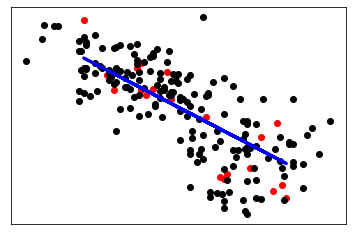

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df_lo[['maximum_temperature_in_dc', ]]
y = df_lo['max_demand']

# Splitting data for test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=20)

# Create linear regression object
regr_lo = linear_model.LinearRegression()

# Train the model using the training sets
regr_lo.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_lo.predict(X_test)

# The coefficients
print("Coefficients: \n", regr_lo.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [196.16646266]
Mean squared error: 192385.63
Coefficient of determination: 0.86


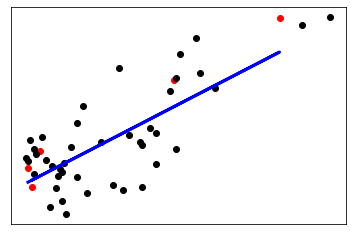

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df_hi[['maximum_temperature_in_dc', ]]
y = df_hi['max_demand']

# Splitting data for test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=20)

# Create linear regression object
regr_hi = linear_model.LinearRegression()

# Train the model using the training sets
regr_hi.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_hi.predict(X_test)

# The coefficients
print("Coefficients: \n", regr_hi.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.scatter(X_train, y_train, color="black")
#plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

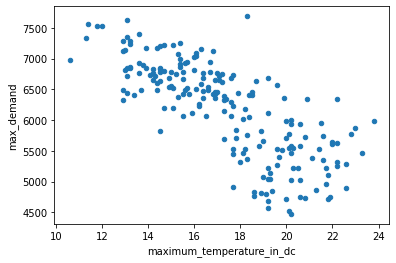

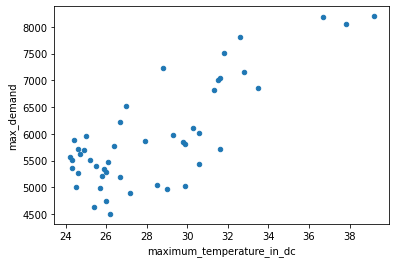

In [8]:
df_lo.plot.scatter(x = 'maximum_temperature_in_dc', y = 'max_demand');
df_hi.plot.scatter(x = 'maximum_temperature_in_dc', y = 'max_demand');

In [21]:
# Using linear regression to predict a data point
max_temp = float(input("Please Enter Maximum Temperature in celsius: "))
#evp = float(input("Please Enter Evaporation in mm: "))
#sun_hr = float(input("Please Enter Sunshine in hours: "))
#cloud = float(input("Please Enter 9 am Cloud amound: "))
lr_data = [[max_temp]]
if max_temp < 24:
    lr_target = regr_lo.predict(lr_data)
else:
    lr_target = regr_hi.predict(lr_data)
print(f"Maximum daily energy usage for provided weather data: {abs(lr_target[0]):.2f}")

Please Enter Maximum Temperature in celsius:  12


Maximum daily energy usage for provided weather data: 7230.78
